In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


In [9]:
with open("./Dummy Datasets X Variable.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

Gender;Usia;Pinjaman;Tenor;Pemasukan;Tanggungan;Pekerjaan

Each data point looks like this:

M;22;2500000;4;4400000;5;Pekerja Lepas



In [10]:
df  = pd.read_csv(r'./Dummy Datasets X Variable.csv', delimiter=';')
print(df.head())

  Gender  Usia  Pinjaman  Tenor  Pemasukan  Tanggungan      Pekerjaan
0      M    22   2500000      4    4400000           5  Pekerja Lepas
1      F    25   1900000     12    1200000           2  Pekerja Lepas
2      F    49   1200000     10    1800000           2      Wirausaha
3      F    58    500000     12    4600000           4  Pekerja Lepas
4      M    47    700000      8    2000000           1       Pedagang


In [11]:
# converting to list
gender_list = df["Gender"].tolist()
usia_list = df["Usia"].tolist()
pinjaman_list = df["Pinjaman"].tolist()
tenor_list = df["Tenor"].tolist()
pemasukan_list = df["Pemasukan"].tolist()
tanggungan_list = df["Tanggungan"].tolist()
pekerjaan_list = df["Pekerjaan"].tolist()

In [12]:
approval = []
i = 0

for i in range(0,10000):
    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 2000000:
        if usia_list[i] <= 58:
            if pekerjaan_list[i] == 'Buruh' or pekerjaan_list[i] == 'Guru/Dosen':
                if gender_list[i] == 'F':
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 1500000*(tanggungan_list[i]+1):
                        approval.append('Y')
                    else:
                        approval.append('N')
                else:
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 1500000*(tanggungan_list[i]+2):
                        approval.append('Y')
                    else:
                        approval.append('N')
            else:
                if gender_list[i] == 'F':
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 150000*(tanggungan_list[i]+1):
                         approval.append('Y')
                    else:
                        approval.append('N')
                else:
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 120000*(tanggungan_list[i]+2):
                        approval.append('Y')
                    else:
                        approval.append('N')
        else:
            if pekerjaan_list[i] == 'Pedagang' or pekerjaan_list[i] == 'Pekerja Lepas' or pekerjaan_list[i] == 'Wirausaha':
                if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 120000*(tanggungan_list[i]+2):
                    approval.append('Y')
                else:
                    approval.append('N')
            else:
                approval.append('N')
    else:
        approval.append('N')

print(len(approval))   




10000


In [13]:
# to remove duplicated from list labels
result = [] 
[result.append(x) for x in approval if x not in result] 

# printing list labels after removal 
print ("The list after removing duplicates: " + str(result)) 

# count number of each label in the data
res = {}

for i in approval:
    res[i] = approval.count(i)
    
print(f"the number of each label in the data:\n {res}")

The list after removing duplicates: ['Y', 'N']
the number of each label in the data:
 {'Y': 5101, 'N': 4899}


In [14]:
data = pd.DataFrame(np.column_stack([approval, 
                                    gender_list,
                                    usia_list,
                                    pinjaman_list,
                                    tenor_list,
                                    pemasukan_list,
                                    tanggungan_list,
                                    pekerjaan_list
                                    ]), 
                               columns=['approval', 'gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan'])

data.head()

,approval,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan
0,Y,M,22,2500000,4,4400000,5,Pekerja Lepas
1,N,F,25,1900000,12,1200000,2,Pekerja Lepas
2,N,F,49,1200000,10,1800000,2,Wirausaha
3,Y,F,58,500000,12,4600000,4,Pekerja Lepas
4,N,M,47,700000,8,2000000,1,Pedagang


In [15]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [16]:
categorical_features = ['approval', 'gender','pekerjaan']
Cat_to_Num(categorical_features)

approval --> {'N': 0, 'Y': 1}
gender --> {'F': 0, 'M': 1}
pekerjaan --> {'Buruh': 0, 'Guru/Dosen': 1, 'Pedagang': 2, 'Pekerja Lepas': 3, 'Wirausaha': 4}


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   approval    10000 non-null  int64 
 1   gender      10000 non-null  int64 
 2   usia        10000 non-null  object
 3   pinjaman    10000 non-null  object
 4   tenor       10000 non-null  object
 5   pemasukan   10000 non-null  object
 6   tanggungan  10000 non-null  object
 7   pekerjaan   10000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [18]:
labels = data['approval']
features = data.drop('approval', axis=1)

In [19]:
col_cat_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan']

features[col_cat_features] = features[col_cat_features].astype('int64')

### -- Normalize Data

In [20]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [21]:
col_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 
                'tanggungan', 'pekerjaan']

features[col_features] = mx.fit_transform(features[col_features])
features.head(5)

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan
0,1.0,0.04,0.80,0.058824,0.842105,1.0,0.75
1,0.0,0.10,0.56,0.529412,0.000000,0.4,0.75
2,0.0,0.58,0.28,0.411765,0.157895,0.4,1.00
3,0.0,0.76,0.00,0.529412,0.894737,0.8,0.75
4,1.0,0.54,0.08,0.294118,0.210526,0.2,0.50


In [22]:
# scale= StandardScaler()
# features = scale.fit_transform(features) 
# print(features)

In [23]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, labels, test_size=0.3, shuffle=True, stratify=labels, random_state=42)

# % of training set
len(X_train)/len(features)

0.7

In [24]:
X_train.head()

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan
7920,0.0,0.02,0.00,0.000000,0.000000,0.6,0.50
8609,1.0,0.10,0.44,1.000000,0.947368,0.8,0.25
4901,1.0,0.28,0.00,0.764706,0.210526,0.8,0.00
6188,1.0,0.08,0.52,0.764706,0.947368,0.4,0.00
4157,0.0,0.60,0.08,0.117647,0.868421,0.2,0.75


In [25]:
X_train = np.array(X_train, dtype='float32')
X_validate = np.array(X_validate, dtype='float32')

y_train = np.array(y_train, dtype='float32')
y_validate = np.array(y_validate, dtype='float32')

In [26]:
X_train

array([[0.        , 0.02      , 0.        , ..., 0.        , 0.6       ,
        0.5       ],
       [1.        , 0.1       , 0.44      , ..., 0.94736844, 0.8       ,
        0.25      ],
       [1.        , 0.28      , 0.        , ..., 0.21052632, 0.8       ,
        0.        ],
       ...,
       [1.        , 0.74      , 0.2       , ..., 0.15789473, 1.        ,
        0.        ],
       [0.        , 0.18      , 1.        , ..., 0.        , 0.6       ,
        0.        ],
       [0.        , 0.18      , 0.52      , ..., 0.21052632, 0.        ,
        0.75      ]], dtype=float32)

In [27]:
X_train.shape, X_validate.shape

((7000, 7), (3000, 7))

In [28]:
y_train.shape, y_validate.shape

((7000,), (3000,))

## Create TF Model

In [29]:
def create_model():
    
    ### START CODE HERE  
    model = tf.keras.Sequential([
        # tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                  metrics=['accuracy'])

    ### END CODE HERE

    return model

In [30]:
mc = ModelCheckpoint('creditapproval_model_v2_04s.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [31]:
model = create_model()

history = model.fit(X_train, y_train, 
                    epochs=300, 
                    batch_size = 32,
                    callbacks = [mc],
                    validation_data=(X_validate, y_validate))

Epoch 1/300
216/219 [============================>.] - ETA: 0s - loss: 0.7063 - accuracy: 0.5266
Epoch 1: val_accuracy improved from -inf to 0.55200, saving model to creditapproval_model_v2_04s.h5
219/219 [==============================] - 3s 5ms/step - loss: 0.7063 - accuracy: 0.5264 - val_loss: 0.6938 - val_accuracy: 0.5520
Epoch 2/300
212/219 [============================>.] - ETA: 0s - loss: 0.6793 - accuracy: 0.5812
Epoch 2: val_accuracy improved from 0.55200 to 0.61033, saving model to creditapproval_model_v2_04s.h5
219/219 [==============================] - 1s 5ms/step - loss: 0.6789 - accuracy: 0.5821 - val_loss: 0.6686 - val_accuracy: 0.6103
Epoch 3/300
211/219 [===========================>..] - ETA: 0s - loss: 0.6535 - accuracy: 0.6428
Epoch 3: val_accuracy improved from 0.61033 to 0.67233, saving model to creditapproval_model_v2_04s.h5
219/219 [==============================] - 1s 5ms/step - loss: 0.6531 - accuracy: 0.6429 - val_loss: 0.6415 - val_accuracy: 0.6723
Epoch 4/30

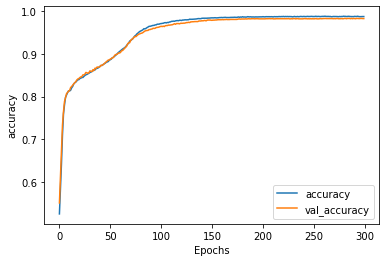

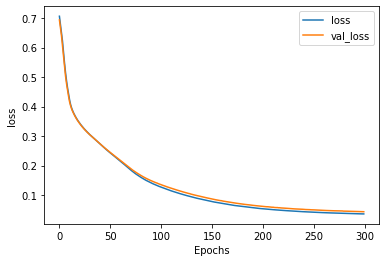

In [32]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [33]:
scores = []
score = model.evaluate(X_validate, y_validate, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

print(cm)
print(classification_report(y_validate, y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))


94/94 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9820
[[1445   25]
 [  29 1501]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1470
         1.0       0.98      0.98      0.98      1530

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

0.9819999933242798


In [216]:
# model.save('creditapproval_model_v2_03s-best.h5')

## Predict Output

In [37]:
final_model = tf.keras.models.load_model('./creditapproval_model_v2_03.h5')

In [38]:
predictions = final_model.predict(X_validate)

In [39]:
# y = y_validate.to_list()
print(y_validate[1])
print(predictions[1])

1.0
[0.956438]


In [37]:
scores = []
score = final_model.evaluate(X_validate, y_validate, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = final_model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

print(cm)
print(classification_report(y_validate,y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))


94/94 [==============================] - 1s 3ms/step - loss: 0.0474 - accuracy: 0.9833
[[1447   23]
 [  27 1503]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1470
         1.0       0.98      0.98      0.98      1530

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

0.9833333492279053


## Convert Model .h5 to TFLite

In [222]:
final_model = tf.keras.models.load_model('./creditapproval_model_v2_04.h5')

# Check its architecture
final_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 64        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [223]:
from keras.models import load_model
saved_model = load_model('creditapproval_model_v2_04.h5')
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = saved_model.evaluate(X_validate, y_validate, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.985, Valid: 0.981


In [224]:
import tempfile
import os

MODEL_DIR = './exp_creditapproval_model_v2_04'

# version = 2

# export_path = os.path.join(MODEL_DIR, str(version))
export_path = os.path.join(MODEL_DIR)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: ./exp_creditapproval_model_v2_04\assets


INFO:tensorflow:Assets written to: ./exp_creditapproval_model_v2_04\assets



export_path = ./exp_creditapproval_model_v2_04


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [225]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'creditapproval_model_v2_04.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

label_types = ['Bad Credit', 'Good Credit']
with open('creditapproval_model_v2_04.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [1]:
# import tensorflow as tf
# model_path = "./creditapproval_model_v2_04/exp_creditapproval_model_v2_04"
# model = tf.saved_model.load(model_path)

## Load TFLite model

Load TensorFlow lite model with interpreter interface.

In [1]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="creditapproval_model_v2_03.tflite")
# interpreter = tf.lite.Interpreter(model_path="regression.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_dense_10_input:0',
  'index': 0,
  'shape': array([1, 7]),
  'shape_signature': array([-1,  7]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [24]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 7,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [38]:
X_validate[1]

array([0.        , 0.94      , 0.        , 0.05882353, 0.28947368,
       0.2       , 0.5       ], dtype=float32)

In [39]:
np_res_im = np.array(X_validate[1])
np_res_im = (np_res_im).astype('float32')
np_res_im

array([0.        , 0.94      , 0.        , 0.05882353, 0.28947368,
       0.2       , 0.5       ], dtype=float32)

In [40]:
print(input_details[0]['shape'])
print(np_res_im.shape)

[1 7]
(7,)


In [41]:
if len(np_res_im.shape) == 1:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [29]:
output_details[0]

{'name': 'StatefulPartitionedCall:0',
 'index': 7,
 'shape': array([1, 1]),
 'shape_signature': array([-1,  1]),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [30]:
output_data.shape

(1, 1)

In [31]:
# print(X_validate[0])
# print(labels[0])
# print(predictions[0])
# print(output_data)

In [43]:
print(X_validate[1])
print('actual labels: ' + str(y_validate[1]))
print('prediction from model.h5: ' + str(predictions[1]))
print('prediction from model.tflite: ' + str(output_data))

[0.         0.94       0.         0.05882353 0.28947368 0.2
 0.5       ]
actual labels: 1.0
prediction from model.h5: [0.956438]
prediction from model.tflite: [[0.95786583]]


In [40]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[0], separator=', '), '\n]}')
print('Expected Result:', predictions[0])
print('Actual Labels:', y_validate[0])

Test Data:

{"instances": [
 [1.        , 0.02      , 0.        , 0.29411766, 1.        , 0.6       ,
 1.        ] 
]}
Expected Result: [0.99999845]
Actual Labels: 1.0


In [43]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[2], separator=', '), '\n]}')
print('Expected Result:', predictions[2])
print('Actual Labels:', y_validate[2])

Test Data:

{"instances": [
 [0.        , 0.94      , 0.6       , 0.4117647 , 0.34210527, 0.        ,
 0.        ] 
]}
Expected Result: [0.03494371]
Actual Labels: 0.0


In [ ]:
{"instances": [
 [0., 0.94, 0.6, 0.4117647 , 0.34210527, 0.,
 0.] 
]}

In [34]:
import joblib
import tensorflow as tf

# final_model = tf.keras.models.load_model('./creditapproval_model_v2_04.h5')
joblib.dump(model, open('creditapproval_model_v2_04s.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://a0a4efde-f473-49e9-9edc-ddb1cc945908/assets


In [35]:
import joblib
import numpy as np
print(joblib.__version__)

model = joblib.load(open("creditapproval_model_v2_04s.pkl", 'rb'))
print(model(np.random.random((1,7))))

1.1.0


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://ad8ba69f-512d-48bd-bfb8-5bedc7b4424c/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [36]:
tf.keras.experimental.export_saved_model(model, './')

AttributeError: module 'keras.api._v2.keras.experimental' has no attribute 'export_saved_model'